# Chapter2. Practice List
1. Preprocessing - Data split, scaling

2. Machine Learning models - supervised, classification
  - logistic regression
  - knn
  - svm
  - decision tree
  - random forest
  - xgboost    

3. Machine Learning models - supervised, regression  
  - regression version (decision tree regressor, svm regressor)

In [1]:
# import modules
import pandas as pd

## Scikit-learn library
파이썬에서 머신러닝을 쉽게 쓸 수 있도록 도와주는 라이브러리  

[주요모듈]  
- sklearn.datasets : 예시데이터  
- sklearn.preprocessing: 데이터 전처리 가공  
- sklearn.decomposition: 차원축소 관련 알고리즘 제공  
- sklearn.model_setlection: 데이터 분리, 검증, 파라미터 튜닝  
- sklearn.metrics: classification, regression, clustering 등 성능 측정방법 제공  
- sklearn.ensemble, sklearn.linear_model, sklearn.naive_bayes, sklearn.neighbors, sklearn.svm, sklearn.tree, sklearn.cluster: 머신러닝 알고리즘  

# 1. Preprocessing
> Datasplit
- dataset should be separated before preprocessing(scaling)  
- use scikit-learn library

> Preprocessing
- normalization

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # datasplit

iris = load_iris()
iris_data = iris.data
iris_label = iris.target
df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
df['label'] = iris.target
# data display
display(df.head(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
# data split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=test_size, random_state=7)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [5]:
# data scaling
'''
 (열) variable별로
 MinMaxScaler: 0~1 로 조정
 StandardScaler: 평균0, 분산1
 MaxAbsScaler: 절대값이 0~1 사이
 RobustScaler: StandardScaler에서 중간값(median)을 빼고 0, 사분위값(Q3-Q1)으로 나눔-극단값에 영향 덜받음
'''
from sklearn.preprocessing import MinMaxScaler#, StandardScaler, MaxAbsScaler, RobustScaler

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # train에서 구한 스케일링 파라미터로
X_test = scaler.transform(X_test) # test를 변환해야함 (fit_transform아님 유의)

# 2. Machine Learning Models - supervised, classification
- logistic regression
- knn
- svm
- decision tree
- random forest in ensemble method (bagging)
- xgboost in ensemble method (boosting)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # performance measure

### 모델 구축 - 훈련 - 평가 Flow

1. 모델구성
 hyperparameter 조절  
2. 모델 훈련  
 모델.fit(X_train, y_train)    
3. 모델 평가  
 y_pred = 모델.predict(X_test)  
4. 성능 계산  
 accuracy_score(y_test, y_pred)  

(모델 1) Logistic Regression

In [8]:
# 1. 모델 구성
lr_clf = LogisticRegression(random_state=0)

In [9]:
# 2. 모델 훈련
lr_clf.fit(X_train, y_train) # training

LogisticRegression(random_state=0)

In [10]:
print(lr_clf.coef_) # weight
print(lr_clf.intercept_) # bias

[[-1.29602544  1.50281168 -2.56592375 -2.49614881]
 [ 0.11733459 -1.77428112  0.43785747 -0.43580031]
 [ 1.17869085  0.27146943  2.12806628  2.93194911]]
[ 1.97291173  1.2715051  -3.24441683]


In [11]:
# 3. 모델 평가
y_pred = lr_clf.predict(X_test) # predict (for test_data)

print(y_pred)
print(y_test)

[2 1 0 1 1 0 2 1 0 2 2 2 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


In [12]:
# Embedding other machine learning modules
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

try:
    from xgboost import XGBClassifier
except ImportError:
    %pip install xgboost
    from xgboost import XGBClassifier

In [13]:
# 1. 모델 구성
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC() # classification
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

hyperparameter 확인방법:
- help(~~)
- shift+tab (vscode, jupyterlab, jupyter notebook)

In [14]:
# 2. 모델 구축
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
# 3. 모델 평가
y_pred1 = knn_clf.predict(X_test)
y_pred2 = dt_clf.predict(X_test)
y_pred3 = svm_clf.predict(X_test)
y_pred4 = rf_clf.predict(X_test)
y_pred5 = xgb_clf.predict(X_test)

In [16]:
def cal_test_acc_score(y_pred):
  return accuracy_score(y_test, y_pred)

In [17]:
# 4. 성능 계산
y_pred_df = pd.DataFrame(y_pred1, columns = ['knn'])
y_pred_df['dt'] = y_pred2
y_pred_df['svm'] = y_pred3
y_pred_df['rf'] = y_pred4
y_pred_df['xgb'] = y_pred5

print(y_pred_df['xgb'].values)
print(y_test)

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


In [18]:
y_pred_df.apply(lambda x: cal_test_acc_score(x))

knn    0.933333
dt     0.900000
svm    0.866667
rf     0.866667
xgb    0.866667
dtype: float64

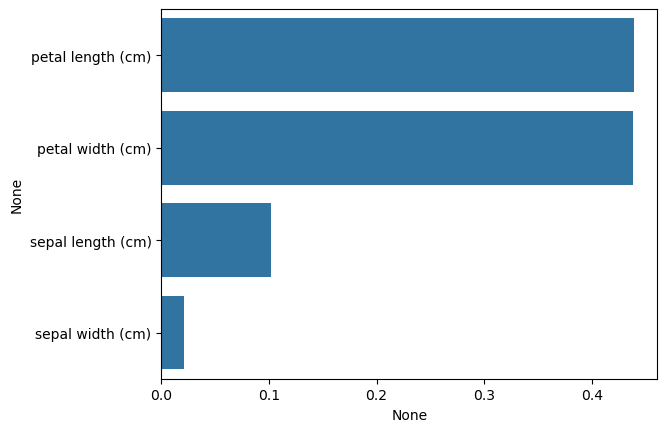

In [19]:
# feature importance using random forest
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf.feature_importances_

feature_importance = pd.Series(rf_clf.feature_importances_, index = iris.feature_names)
feature_importance = feature_importance.sort_values(ascending=False)


sns.barplot(x = feature_importance, y = feature_importance.index)
plt.show()


In [20]:
# parameter 조정
# help(knn_clf)
# dir(knn_clf)
# knn_clf.n_neighbors
rf_clf.n_estimators

100

In [21]:
rf_clf

RandomForestClassifier()

In [22]:
rf_list = [25, 50, 100, 150, 200]#[3,4,5,6,7,8]
acc_list = []
for k in rf_list:
    rf = RandomForestClassifier(n_estimators=k)
    rf_fit = rf.fit(X_train, y_train)
    scores = accuracy_score(y_test, rf_fit.predict(X_test))
    acc_list.append(scores)
acc_list

# # k의 변화에 따른 정확도 시각화
# import matplotlib.pyplot as plt
# plt.plot(rf_list, acc_list)
# plt.xlabel('the number of k')
# plt.ylabel('Accuracy')
# plt.show()

[0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

#### Use GridSearchCV to find the best hyperparameters for RandomForestClassifier

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5,  n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [1, 2, 3, 4, 5]},
             verbose=1)

In [24]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'n_estimators': 3}


In [25]:
cv_results = grid_search.cv_results_

means = cv_results['mean_test_score']  # 각 조건별 평균 테스트 스코어
stds = cv_results['std_test_score']  # 각 조건별 표준편차
params = cv_results['params']  # 각 조건별 사용된 파라미터

# 각 결과를 출력
for mean, std, param in zip(means, stds, params):
    print(f"Mean accuracy: {mean:.3f}, Std: {std:.3f} with: {param}")

Mean accuracy: 0.975, Std: 0.020 with: {'max_depth': None, 'n_estimators': 1}
Mean accuracy: 0.958, Std: 0.026 with: {'max_depth': None, 'n_estimators': 2}
Mean accuracy: 0.992, Std: 0.017 with: {'max_depth': None, 'n_estimators': 3}
Mean accuracy: 0.975, Std: 0.020 with: {'max_depth': None, 'n_estimators': 4}
Mean accuracy: 0.967, Std: 0.017 with: {'max_depth': None, 'n_estimators': 5}
Mean accuracy: 0.683, Std: 0.020 with: {'max_depth': 1, 'n_estimators': 1}
Mean accuracy: 0.758, Std: 0.110 with: {'max_depth': 1, 'n_estimators': 2}
Mean accuracy: 0.675, Std: 0.017 with: {'max_depth': 1, 'n_estimators': 3}
Mean accuracy: 0.742, Std: 0.113 with: {'max_depth': 1, 'n_estimators': 4}
Mean accuracy: 0.808, Std: 0.157 with: {'max_depth': 1, 'n_estimators': 5}
Mean accuracy: 0.867, Std: 0.096 with: {'max_depth': 2, 'n_estimators': 1}
Mean accuracy: 0.958, Std: 0.026 with: {'max_depth': 2, 'n_estimators': 2}
Mean accuracy: 0.967, Std: 0.017 with: {'max_depth': 2, 'n_estimators': 3}
Mean accur

In [26]:
# Best model from GridSearch
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestClassifier(n_estimators=3)

In [27]:
# Step 6: Predict the probabilities for the test set
y_pred = best_rf_model.predict(X_test)
print(y_pred)
print(y_test)

print(accuracy_score(y_test, best_rf_model.predict(X_test)))

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 1 2 1 1 2 2]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]
0.8333333333333334


# 3. Machine Learning models - supervised, regression

- knn
- svm
- decision tree
- random forest
- xgboost

In [28]:
# data load - diabetes open dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_data = diabetes.data
diabetes_y = diabetes.target
df = pd.DataFrame(data = diabetes_data, columns = diabetes.feature_names)
df['target'] = diabetes.target
# data display
display(df.head(3))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [29]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_y, test_size=test_size)


In [30]:
# Embedding other machine learning modules
from sklearn.neighbors import KNeighborsRegressor # knn
from sklearn.tree import DecisionTreeRegressor # decision tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [31]:
# 1. 모델 구성
knn_regr = KNeighborsRegressor()
dt_regr = DecisionTreeRegressor()
svm_regr = SVR() # classification
rf_regr = RandomForestRegressor()
xgb_regr = XGBRegressor()

In [32]:
# 2. 모델 구축
knn_regr.fit(X_train, y_train)
dt_regr.fit(X_train, y_train)
svm_regr.fit(X_train, y_train)
rf_regr.fit(X_train, y_train)
xgb_regr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
# 3. 모델 평가
y_pred1 = knn_regr.predict(X_test)
y_pred2 = dt_regr.predict(X_test)
y_pred3 = svm_regr.predict(X_test)
y_pred4 = rf_regr.predict(X_test)
y_pred5 = xgb_regr.predict(X_test)

In [34]:
# 4. 성능 계산
y_pred_df = pd.DataFrame(y_pred1, columns = ['knn'])
y_pred_df['dt'] = y_pred2
y_pred_df['svm'] = y_pred3
y_pred_df['rf'] = y_pred4
y_pred_df['xgb'] = y_pred5

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
def cal_rmse(y_pred):
  return mean_squared_error(y_test,y_pred)

In [36]:
y_pred_df.apply(lambda x: cal_rmse(x))

knn    3415.324494
dt     7145.483146
svm    4824.603672
rf     3475.432599
xgb    4265.562519
dtype: float64

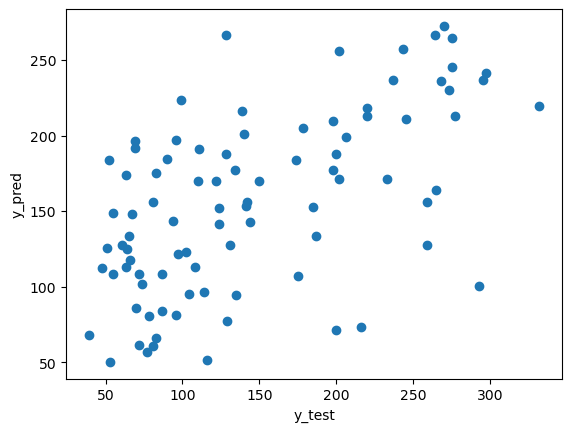

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, y_pred_df['xgb'], 'o')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()